In [2]:
%reset
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from functions import loader, splt, fitter, stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

savedir = "D02/"

In [2]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

135

In [9]:
for d in data:
    # x, y = fitter.rebin_width( d['h_x'], d['h'], 0.0002 )
    x, y = fitter.rebin_n( d['h_x'], d['h'], 50 )
    d['fits'] = fitter.fits( x, y, d, plot=False )
    d['skew'] = skew( d['chunks'], bias=True )
    d['npskew'] = ( np.mean( d['chunks'] ) - np.median( d['chunks'] ) ) / np.std( d['chunks'], ddof = 1 )
    d['Z&S'] = np.sqrt( 2 * len( d['chunks'] ) ) * ( np.mean( d['chunks'] ) - np.median( d['chunks'] ) ) / np.std( d['chunks'], ddof = 1 )
    d['kurt'] = kurtosis( d['chunks'] )

48
131072, 65536, 65536, 32768, 1048576, 262144, 262144, 524288, 32768, 65536, 262144, 65536, 65536, 262144, 262144, 32768, 262144, 131072, 65536, 65536, 8192, 4096, 16384, 65536, 16384, 16384, 262144, 131072, 131072, 65536, 32768, 65536, 65536, 131072, 131072, 131072, 262144, 262144, 262144, 131072, 262144, 262144, 131072, 131072, 131072, 65536, 65536, 131072, 262144, 65536, 32768, 65536, 131072, 131072, 131072, 16384, 65536, 65536, 65536, 131072, 262144, 32768, 131072, 131072, 32768, 65536, 32768, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 65536, 65536, 131072, 131072, 65536, 131072, 262144, 262144, 262144, 65536, 65536, 32768, 262144, 131072, 16384, 262144, 262144, 262144, 131072, 65536, 32768, 131072, 262144, 262144, 32768, 65536, 131072, 65536, 524288, 131072, 65536, 131072, 65536, 131072, 65536, 131072, 262144, 262144, 131072, 65536, 65536, 131072, 512, 512, 512, 1024, 1024, 128, 

In [11]:
filtered_data = data[ np.vectorize( lambda d: (d['defects_frac'] < 0.3 ) and ( d['side'] == 512 ) and ( d['gamma'] in [ .4, .8, 1.2, 1.6 ] ) )(data) ]
print( len( filtered_data ) )

for d in data:
    print( len( d['chunks'] ), end=", ")

36
131072, 65536, 65536, 32768, 1048576, 262144, 262144, 524288, 32768, 65536, 262144, 65536, 65536, 262144, 262144, 32768, 262144, 131072, 65536, 65536, 8192, 4096, 16384, 65536, 16384, 16384, 262144, 131072, 131072, 65536, 32768, 65536, 65536, 131072, 131072, 131072, 262144, 262144, 262144, 131072, 262144, 262144, 131072, 131072, 131072, 65536, 65536, 131072, 262144, 65536, 32768, 65536, 131072, 131072, 131072, 16384, 65536, 65536, 65536, 131072, 262144, 32768, 131072, 131072, 32768, 65536, 32768, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 8192, 65536, 65536, 131072, 131072, 65536, 131072, 262144, 262144, 262144, 65536, 65536, 32768, 262144, 131072, 16384, 262144, 262144, 262144, 131072, 65536, 32768, 131072, 262144, 262144, 32768, 65536, 131072, 65536, 524288, 131072, 65536, 131072, 65536, 131072, 65536, 131072, 262144, 262144, 131072, 65536, 65536, 131072, 512, 512, 512, 1024, 1024, 128, 

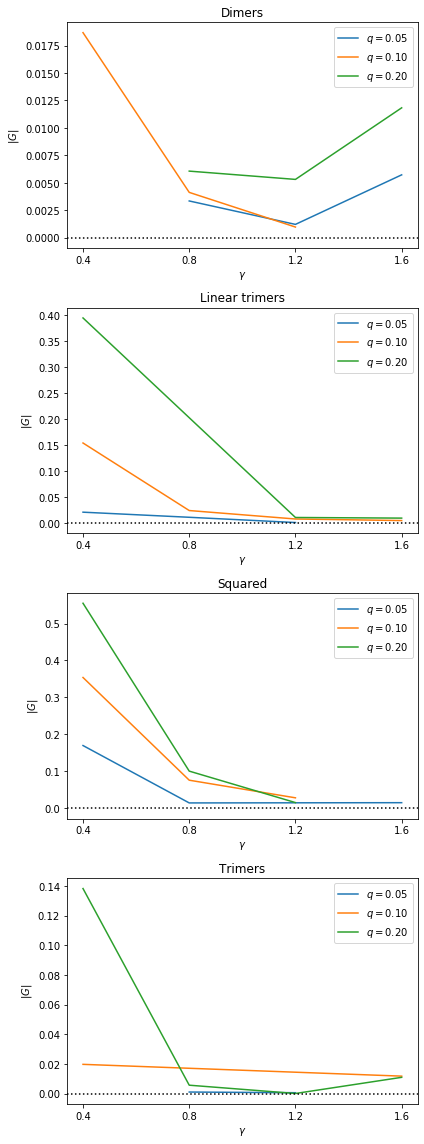

In [13]:
splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 1,
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        abs( filtered_data[d]['skew'] ),
    ],
    lambda r, c, l: [
        { 'label': fr"$q = {l:.2f}$" }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$|G|$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "skewness.pdf" )

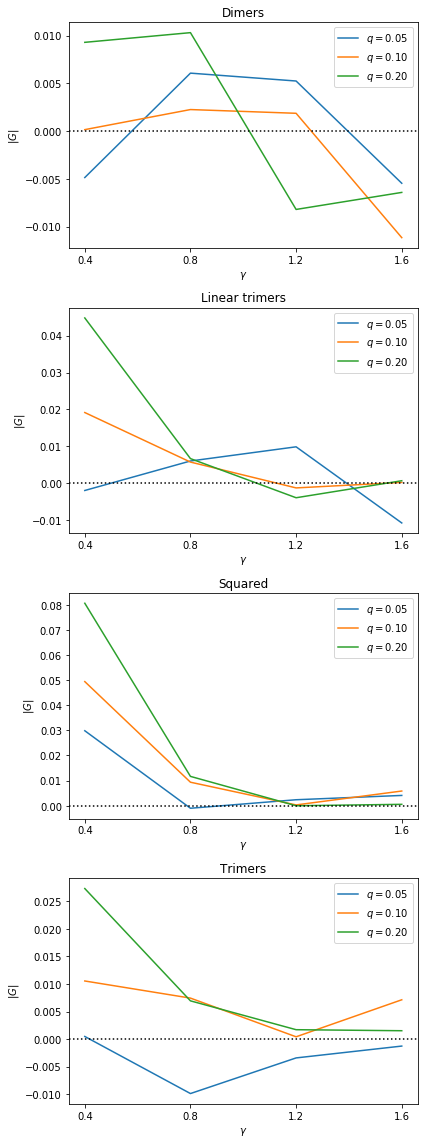

In [6]:
splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 1,
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        filtered_data[d]['npskew'],
    ],
    lambda r, c, l: [
        { 'label': fr"$q = {l:.2f}$" }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$|G|$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "nonparametric_skewness.pdf" )

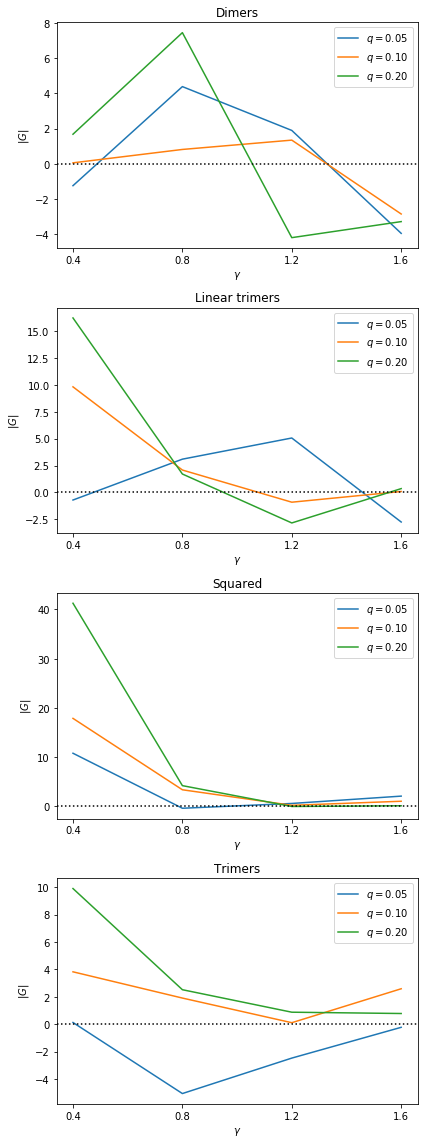

In [7]:
splt.iterate(
    len( filtered_data ),
    lambda d: filtered_data[d]['dep_polymers'],
    lambda d: 1,
    lambda d: filtered_data[d]['defects_frac'],
    lambda d: filtered_data[d]['gamma'],
    lambda d: [
        filtered_data[d]['Z&S'],
    ],
    lambda r, c, l: [
        { 'label': fr"$q = {l:.2f}$" }
    ],
    lambda r, c: (
        plt.title( fr"{r}" ),
        # plt.xscale( 'log', basex = 2 ),
        # plt.yscale( 'log', basey = 10 ),
        plt.xlabel( fr"$\gamma$" ),
        splt.hline( 0 ),
        plt.ylabel( fr"$|G|$" )
    )
)

plt.tight_layout()
plt.savefig( savedir + "ZhengAndGastwirth.pdf" )

In [6]:
# filtered_data = data[ np.vectorize( lambda d: d['defects_frac'] < 0.3 )(data) ]

# splt.iterate(
#     len( filtered_data ),
#     lambda d: filtered_data[d]['dep_polymers'],
#     lambda d: filtered_data[d]['defects_frac'],
#     lambda d: filtered_data[d]['gamma'],
#     lambda d: filtered_data[d]['side'],
#     lambda d: [
#         filtered_data[d]['fits']['GG']['chi2'] / filtered_data[d]['fits']['Gauss']['chi2'],
#     ],
#     lambda r, c, l: [
#         { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-' }
#     ],
#     lambda r, c: (
#         plt.title( fr"{r}, $q = {c:.1f}$" ),
#         plt.xscale( 'log', basex = 2 ),
#         plt.yscale( 'log', basey = 10 ),
#         plt.xlabel( "Side" ),
#         plt.ylabel( fr"$\chi^2_{{GG}} / \chi^2_{{Gauss}}$" ),
#         splt.hline( 1 )
#         # plt.xlim( 2**6 * 0.8, 2**11 * 1.2 )
#     )
# )

# plt.tight_layout()
# plt.savefig( savedir + "chi2ratio.pdf" )

In [7]:
# filtered_data = data[ np.vectorize( lambda d: d['defects_frac'] < 0.3 )(data) ]

# splt.iterate(
#     len( filtered_data ),
#     lambda d: filtered_data[d]['dep_polymers'],
#     lambda d: filtered_data[d]['defects_frac'],
#     lambda d: filtered_data[d]['side'],
#     lambda d: filtered_data[d]['gamma'],
#     lambda d: [
#         filtered_data[d]['fits']['GG']['chi2'] / filtered_data[d]['fits']['Gauss']['chi2'],
#     ],
#     lambda r, c, l: [
#         { 'label': fr"$Side = {l:.0f}$", 'ls': '-', 'marker': '+' }
#     ],
#     lambda r, c: (
#         plt.title( fr"{r}, $q = {c:.1f}$" ),
#         # plt.xscale( 'log', basex = 2 ),
#         plt.yscale( 'log', basey = 10 ),
#         plt.xlabel( fr"$\gamma$" ),
#         plt.ylabel( fr"$\chi^2_{{GG}} / \chi^2_{{Gauss}}$" ),
#         splt.hline( 1 )
#         # plt.xlim( 2**6 * 0.8, 2**11 * 1.2 )
#     )
# )

# plt.tight_layout()
# plt.savefig( savedir + "chi2ratio.pdf" )

In [8]:
# filtered_data = data[ np.vectorize( lambda d: d['defects_frac'] < 0.3 )(data) ]

# splt.iterate(
#     len( filtered_data ),
#     lambda d: filtered_data[d]['dep_polymers'],
#     lambda d: filtered_data[d]['defects_frac'],
#     lambda d: filtered_data[d]['side'],
#     lambda d: filtered_data[d]['gamma'],
#     lambda d: [
#         filtered_data[d]['kurt'],
#     ],
#     lambda r, c, l: [
#         { 'label': fr"$Side = {l:.0f}$", 'ls': '-', 'marker': '+' }
#     ],
#     lambda r, c: (
#         plt.title( fr"{r}, $q = {c:.2f}$" ),
#         # plt.xscale( 'log', basex = 2 ),
#         # plt.yscale( 'log', basey = 10 ),
#         plt.xlabel( fr"$\gamma$" ),
#         splt.hline( 0 ),
#         plt.ylabel( fr"Kurtosis" )
#     )
# )

# plt.tight_layout()
# plt.savefig( savedir + "kurtosis.pdf" )

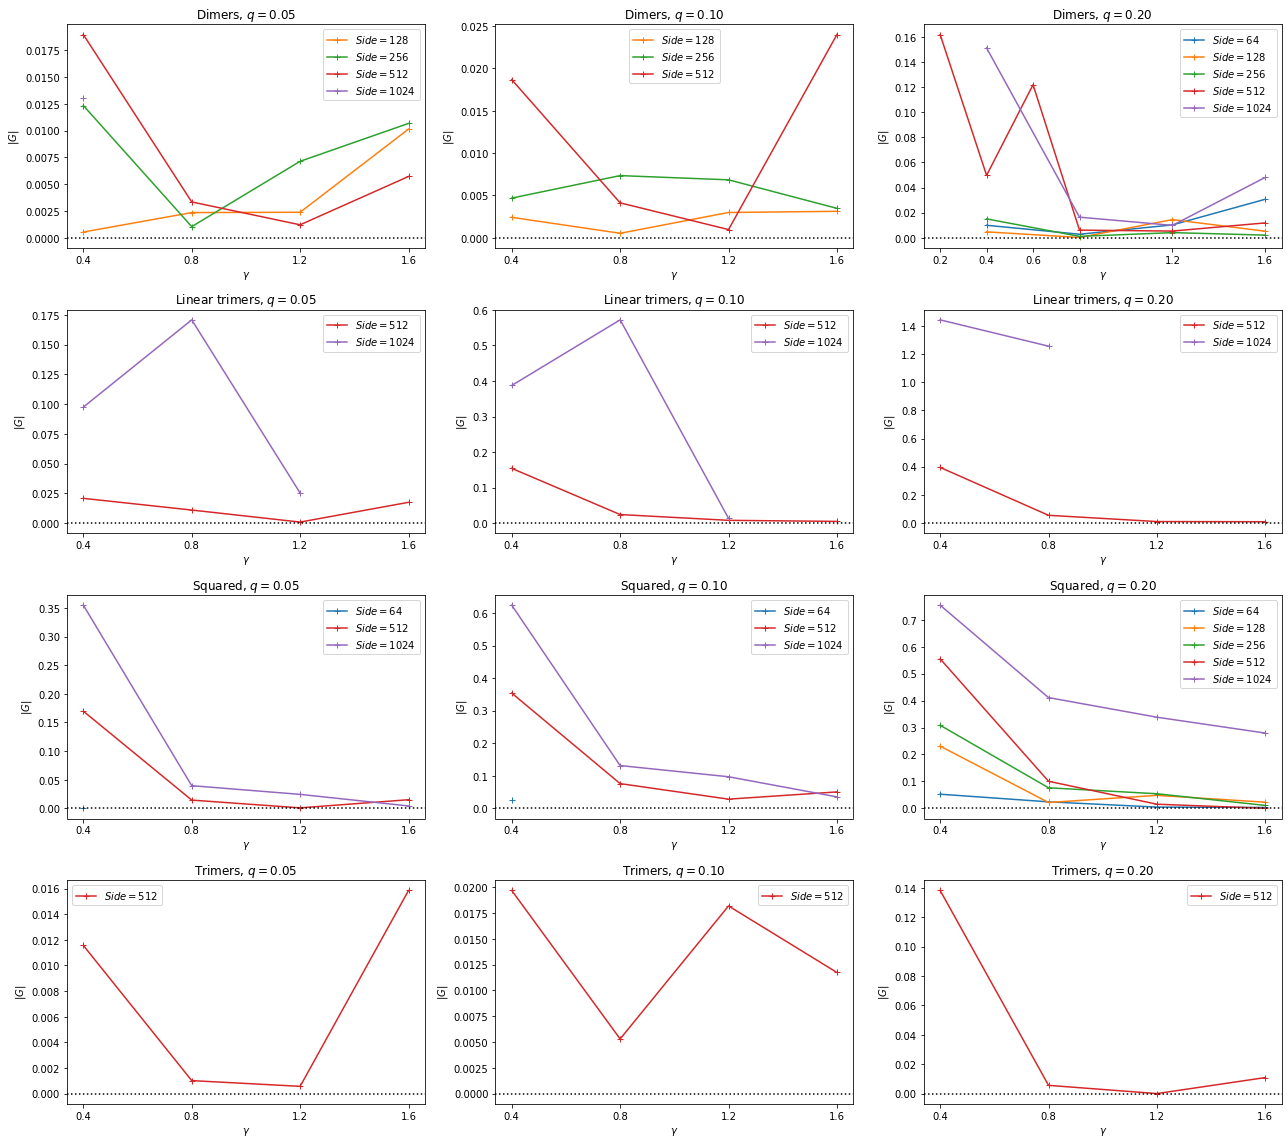